In [1]:
Pkg.add("LowRankModels")
Pkg.add("DataFrames")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of LowRankModels
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of DataFrames
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
Pkg.checkout("LowRankModels")

INFO: Checking out LowRankModels master...
INFO: Pulling LowRankModels latest master...
INFO: No packages to install, update or remove


In [3]:
using LowRankModels
using DataFrames
using PyPlot

### Load 60000 Mnist data

In [5]:
Mnist = Array(Bool, 60000, 784);

In [6]:
df = readtable("mnist_train_1_7500.csv", header = false);
Mnist1 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist1[row,col-1] = df[row,col]
    end
end


In [ ]:
#First Image
pic = (reshape(Mnist1[1,:],28,28))';

#Plot First Image
matshow(pic, cmap=ColorMap("gray"));

In [5]:
#Use 1st 7500 images of Mnist Train set
df = readtable("mnist_train_1_7500.csv", header = false);
Mnist1 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist1[row,col-1] = df[row,col]
    end
end

Mnist1 = round(Mnist1/255)
Mnist1 = convert(Array{Bool}, Mnist1);

In [6]:
#Use 2nd 7500 images of Mnist Train set
df = readtable("mnist_train_2_7500.csv", header = false);
Mnist2 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist2[row,col-1] = df[row,col]
    end
end

Mnist2 = round(Mnist2/255)
Mnist2 = convert(Array{Bool}, Mnist2);

In [7]:
#Use 3rd 7500 images of Mnist Train set
df = readtable("mnist_train_3_7500.csv", header = false);
Mnist3 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist3[row,col-1] = df[row,col]
    end
end

Mnist3 = round(Mnist3/255)
Mnist3 = convert(Array{Bool}, Mnist3);

In [8]:
#Use 4th 7500 images of Mnist Train set
df = readtable("mnist_train_4_7500.csv", header = false);
Mnist4 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist4[row,col-1] = df[row,col]
    end
end

Mnist4 = round(Mnist4/255)
Mnist4 = convert(Array{Bool}, Mnist4);

In [9]:
#Use 5th 7500 images of Mnist Train set
df = readtable("mnist_train_5_7500.csv", header = false);
Mnist5 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist5[row,col-1] = df[row,col]
    end
end

Mnist5 = round(Mnist5/255)
Mnist5 = convert(Array{Bool}, Mnist5);

In [10]:
#Use 6th 7500 images of Mnist Train set
df = readtable("mnist_train_6_7500.csv", header = false);
Mnist6 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist6[row,col-1] = df[row,col]
    end
end

Mnist6 = round(Mnist6/255)
Mnist6 = convert(Array{Bool}, Mnist6);

In [11]:
#Use 7th 7500 images of Mnist Train set
df = readtable("mnist_train_7_7500.csv", header = false);
Mnist7 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist7[row,col-1] = df[row,col]
    end
end

Mnist7 = round(Mnist7/255)
Mnist7 = convert(Array{Bool}, Mnist7);

In [12]:
#Use 8th 7500 images of Mnist Train set
df = readtable("mnist_train_8_7500.csv", header = false);
Mnist8 = Array(Float64,nrow(df),ncol(df)-1)

for row = 1:nrow(df)
    for col = 2:ncol(df)
        Mnist8[row,col-1] = df[row,col]
    end
end

Mnist8 = round(Mnist8/255)
Mnist8 = convert(Array{Bool}, Mnist8);

In [13]:
Mnist[1:7500,:] = Mnist1;
Mnist[7501:15000,:] = Mnist2;
#Mnist[15001:22500,:] = Mnist3;
#Mnist[22501:30000,:] = Mnist4;
#Mnist[30001:37500,:] = Mnist5;
#Mnist[37501:45000,:] = Mnist6;
#Mnist[45001:52500,:] = Mnist7;
#Mnist[52501:60000,:] = Mnist8;

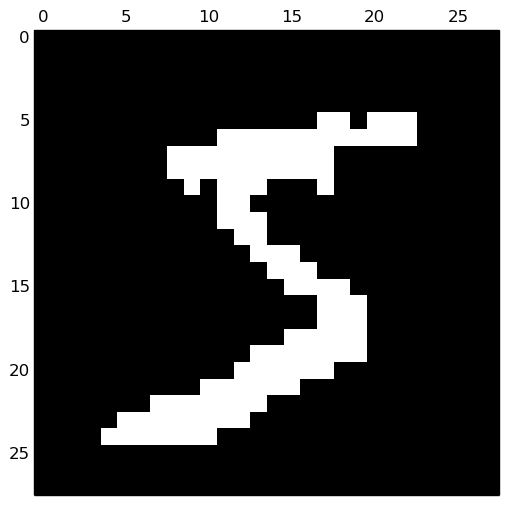

In [14]:
#First Image
pic = (reshape(Mnist[1,:],28,28))';

#Plot First Image
matshow(pic, cmap=ColorMap("gray"));

In [15]:
#Fit GLRM to Data

#The signature of fit! is

#fit!(GLRMs, params)

#Set params = ProxGradParams(maxiters=500)


m,n,k = 15000,784,15
losses = HingeLoss() 
params = ProxGradParams(max_iter = 500)
rx = ZeroReg()
ry = ZeroReg()
glrm = GLRM(Mnist,losses,rx,ry,k);

In [ ]:
#Compute weights
X,Y,ch = fit!(glrm, params);

In [1]:
numbers = (12*1000) + (12*784)
numbers*16

342528

In [67]:
binary_numbers = (784*1000)/2

392000.0

In [8]:
#Recover Data
X_16 = convert(Array{Float16}, X)
Y_16 = convert(Array{Float16}, Y)

DataLowR = X'*Y
DataLowR = sign(DataLowR);

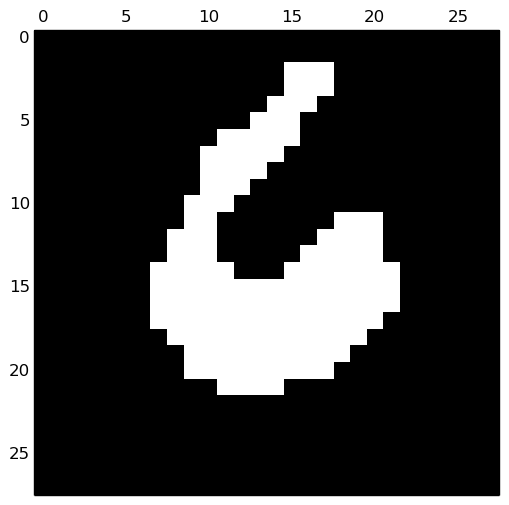

PyObject <matplotlib.image.AxesImage object at 0x7f098ff2bb90>

In [38]:
#Plot Lossy First Image
matshow((reshape(DataLowR[300,:],28,28))', cmap=ColorMap("gray"))

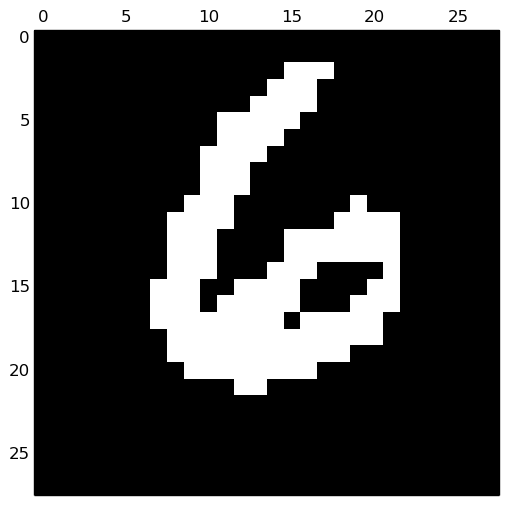

PyObject <matplotlib.image.AxesImage object at 0x7f098ffb3bd0>

In [37]:
#First Image
matshow((reshape(Mnist[300,:],28,28))', cmap=ColorMap("gray"))

In [12]:
X[1,1]

0.27620849130313135

In [54]:
X

50×1000 Array{Float64,2}:
  0.140025    0.852759    -0.543898   …   0.319702     0.9741     -0.921431 
 -1.04593     0.496095     0.0256479     -0.418934    -0.462701   -1.6753   
  0.184914    0.308125    -0.243555       0.513866     0.483239    0.273902 
  0.670799   -0.164262     0.580262      -1.00026     -0.654665   -0.221929 
 -0.606231    0.214761     0.209027      -1.6268      -0.399755   -1.80804  
  1.55295    -1.08294     -0.595251   …  -1.222       -0.308477   -0.672129 
 -0.122928   -0.220621     0.401676       0.707312     0.344107    1.45842  
  0.659707   -0.41856      0.614731      -0.693272     0.462128    0.107009 
 -0.799879    0.446269    -0.461139       1.34699     -1.50324    -0.282857 
 -0.458608   -0.551643     0.855372      -0.323823     0.42836     0.99018  
 -0.592138    0.00764481  -1.19481    …  -2.0603       0.618422   -0.738702 
 -0.586529   -0.914668    -0.309742      -0.475934    -0.0974207  -0.476629 
  0.309943   -0.345009    -0.292523       0.306863

50×1000 Array{Float16,2}:
  0.14001    0.85254    -0.54395   …   0.31982     0.97412   -0.92139 
 -1.0459     0.49609     0.02565      -0.41895    -0.46265   -1.6758  
  0.18494    0.30811    -0.24353       0.51367     0.48315    0.27393 
  0.6709    -0.16431     0.58008      -1.0        -0.65479   -0.22192 
 -0.60645    0.21472     0.20898      -1.627      -0.39966   -1.8076  
  1.5527    -1.083      -0.59521   …  -1.2217     -0.30859   -0.67236 
 -0.12292   -0.22058     0.40161       0.70752     0.34399    1.458   
  0.65967   -0.41846     0.61475      -0.69336     0.46216    0.10699 
 -0.7998     0.44629    -0.46118       1.3467     -1.5029    -0.28296 
 -0.4585    -0.55176     0.85547      -0.32373     0.42847    0.99023 
 -0.59229    0.0076447  -1.1943    …  -2.0605      0.61865   -0.73877 
 -0.58643   -0.91455    -0.30981      -0.47583    -0.097412  -0.47656 
  0.31006   -0.34497    -0.29248       0.30688    -0.022263  -0.65479 
  ⋮                                ⋱               

50×784 Array{Float16,2}:
 -0.55566   -0.41528   -1.584     …  -1.6416     0.14124    -1.3291  
  0.13354    0.77051    0.62793       0.70264    0.13062     0.71973 
  0.27075    0.59229   -1.0566        0.35327   -0.7373      0.27686 
  0.20801    0.58252   -0.45532       0.23767   -0.78906    -1.2539  
  0.25952    0.63086   -0.18787       0.79297    1.0195      0.79834 
  0.39551    0.12036    0.73389   …   0.22351    0.67432     0.86279 
 -0.2627     1.0107     0.38208      -1.2178    -1.1309      0.66797 
  1.2402    -0.85693   -1.3428        0.12903   -0.28687    -0.88867 
 -0.20081    0.33838    0.33521      -0.46606   -0.5459     -0.54004 
  1.3623     0.43872   -0.013008     -0.058563   0.47729    -0.51221 
  0.54053    0.59521    1.7666    …  -0.26709    0.46924     0.44092 
  0.64404    0.90479    0.82129      -0.46704    0.88281    -0.067078
  1.3916    -0.19519    0.40259       1.2725    -0.94482    -0.95996 
  ⋮                               ⋱                              